# **Análisis de la distribución geográfica de *Apis mellifera* según variables climáticas en Costa Rica y Brasil**

### Integrantes: Maripaz Roldán-Morales y Anaclara Arce

## **Descripción del proyecto**
El presente proyecto analiza la población de la *Apis Mellifera* en dos países diferentes (Costa Rica y Brasil) según su relación con variables climáticas para poder determinar la correlación que existe.

## **Justificación**
Las abejas cumplen un rol fundamental en la polinización natural de cultivos agrícolas y de las plantas. Sin embargo, las poblaciones de estas se están reduciendo drásticamente en los ecosistemas por diversos factores. La *Apis mellifera* es una especie de abeja que se está viendo fuertemente afectada debido a múltiples factores relacionados con el cambio climático, las malas prácticas y la disminución de los hábitats. (Sevilla et al, 2023). La *Apis mellifera* fue introducida tanto en Costa Rica como en Brasil, sin embargo, las poblaciones evolucionaron de manera distinta debido a las condiciones ambientales como precipitación, temperatura y vegetación, de esta manera, realizar esta comparación ayuda a entender las preferencias de esta especie y su capacidad de adaptación.

## **Antecedentes**

Las abejas de origen africano *Apis mellifera* se introdujeron en Brasil en 1956 con el propósito de obtener una línea de abejas mejor adaptada a las condiciones tropicales y altamente productora de miel. Sin embargo, 26 enjambres con sus reinas africanas se cruzaron con abejas de origen europeo lo que generó un híbrido que dio como resultado a la denominada abeja africanizada, posteriormente estas poblaciones se desplazaron a países del Sur y Centroamérica, originando este proceso de africanización que reemplazo a las poblaciones de abejas europeas (Guzmán et al, 2011). En Costa Rica los primeros enjambres de estas abejas africanizadas se reportaron en 1983 (Spivak et al, 1991).
Las abejas africanizadas se caracterizan por ser más enjambradoras que las europeas (Calderón et al, 2019). Poseen una tasa elevada de reproducción y enjambrazón, lo cual ha favorecido la colonización de las diferentes regiones tropicales del continente americano (Guzmán et al, 2011).
Lastimosamente, durante los últimos años se han reportado considerables pérdidas en el número de colmenas de estas abejas (Martínez et al, 2011). Diversos estudios previos han demostrado que las condiciones climáticas y ambientales han influido en el comportamiento higiénico de las poblaciones de abejas melliferas. El comportamiento higiénico de las abejas es un mecanismo altamente influenciado por efectos genéticos que les confiere a las abejas resistencia contra enfermedades y parásitos (Tapia et al, 2021). Estos estudios realizados determinan que las colonias establecidas en regiones más cálidas y a menor altitud poseen mayores grados de comportamiento higiénico (Tapia et al, 2011).


## **Descripción del problema y objetivo**

Como problemática se tiene la reducción significativa de la población en diferentes ecosistemas debido a factores como cambio climático, la reducción de hábitats y las malas prácticas agrícolas. A pesar de ser una especie introducida para Costa Rica y Brasil ha experimentado diversos patrones de evolución diferentes según las condiciones climáticas locales como la precipitación, la vegetación y la temperatura. Es de suma importancia analizar estas diferencias para poder entender mejor a la especie y de esta manera determinar patrones de adaptación y supervivencia, ofreciendo información importante para mitigar la pérdida de esta especie clave en el ecosistema.

Objetivo:
El principal objetivo del proyecto es analizar la relación entre poblaciones de *Apis mellifera* en Costa Rica y Brasil según las variables climáticas de cada país para determinar la correlación entre las variables y así determinar la adaptación de la especie en dichos entornos.

## **Base de datos**

* Para los datos biológicos (observaciones de *Apis mellifera*) se utilizó la base de datos de Global Biodiversity Information Facility (GBIF) para el país de  Costa Rica y Brasil. Los datos fueron filtrados para incluir únicamente las observaciones registradas desde el año 2000 hasta el presente y también los datos que tuvieran coordenadas geográficas.

* Para los datos ambientales de temperatura promedio y precipitación se utilizó la base de datos de WorldClim versión 2.1 , los cuales consisten en datos climáticos globales, históricos (desde 1970 hasta el 2000), que fueron descargados con una resolución espacial de 30 s (aproximadamente 1km x 1km).

* Además, se utilizaron las capas geográficas de Costa Rica y de Brasil de la base de datos de GADM (https://gadm.org/data.html), versión 4.1.

## **Preprocesamiento y visualización**

In [ ]:
# Librerias necesarias para realizar el proyecto
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
!pip install rasterio
import os
import rasterio
from rasterio.plot import show
!pip install rioxarray
import rioxarray as rxr

from rasterio.features import geometry_mask
import seaborn as sns
from shapely.geometry import Point

In [ ]:
# Cargar datos biológicos
df = pd.read_csv("/content/Apis mellifera_CostaRica_Brasil.csv",
                 delimiter='\t')
print(df.columns)

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


In [ ]:
# Filtrar datos por pais
df_costa_rica = df[df['countryCode'] == 'CR']
df_costa_rica

gbifID                            datasetKey  \
50    4937261335  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
61    4936986884  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
66    4936818036  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
69    4936647470  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
80    4936416451  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
...          ...                                   ...   
6880  1255571529  3e9817c1-8302-4955-87e3-a408db0ea379   
6881  1255554315  3e9817c1-8302-4955-87e3-a408db0ea379   
6882  1255554312  3e9817c1-8302-4955-87e3-a408db0ea379   
6883  1255554237  3e9817c1-8302-4955-87e3-a408db0ea379   
6884  1249291469  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                           occurrenceID   kingdom      phylum  \
50    https://www.inaturalist.org/observations/23928...  Animalia  Arthropoda   
61    https://www.inaturalist.org/observations/23933...  Animalia  Arthropoda   
66    https://www.inaturalist.org/observations/11947...  Animalia  Arthropoda   
69    https://www.inaturalist.org/observations/66475909  Animalia  Arthropoda   
80    https://www.inaturalist.org/observations/68559870  Animalia  Arthropoda   
...                                                 ...       ...         ...   
6880                       urn:catalog:INB:Atta:3072955  Animalia  Arthropoda   
6881                       urn:catalog:INB:Atta:3083043  Animalia  Arthropoda   
6882                       urn:catalog:INB:Atta:3083042  Animalia  Arthropoda   
6883                       urn:catalog:INB:Atta:3083010  Animalia  Arthropoda   
6884    http://www.inaturalist.org/observations/2665398  Animalia  Arthropoda   

        class        order  family genus         species  ...  \
50    Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
61    Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
66    Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
69    Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
80    Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
...       ...          ...     ...   ...             ...  ...   
6880  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
6881  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
6882  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
6883  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   
6884  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   

                       identifiedBy       dateIdentified       license  \
50                          Orlaith  2024-09-02T10:03:18  CC_BY_NC_4_0   
61                     Bruce Coto R  2024-09-02T05:32:49  CC_BY_NC_4_0   
66           Selena González Aragón  2022-05-30T20:25:34  CC_BY_NC_4_0   
69    Jorge Arturo Bogantes Montero  2020-12-12T18:38:57  CC_BY_NC_4_0   
80    Jorge Arturo Bogantes Montero  2021-01-24T19:35:10  CC_BY_NC_4_0   
...                             ...                  ...           ...   
6880                  Brooks, R. W.                  NaN       CC0_1_0   
6881                  Brooks, R. W.                  NaN       CC0_1_0   
6882                  Brooks, R. W.                  NaN       CC0_1_0   
6883                  Brooks, R. W.                  NaN       CC0_1_0   
6884                 Sam Kieschnick  2016-02-10T21:50:43  CC_BY_NC_4_0   

                       rightsHolder                     recordedBy typeStatus  \
50                          Orlaith                        Orlaith        NaN   
61                     Bruce Coto R                   Bruce Coto R        NaN   
66           Selena González Aragón         Selena González Aragón        NaN   
69    Jorge Arturo Bogantes Montero  Jorge Arturo Bogantes Montero        NaN   
80    Jorge Arturo Bogantes Montero  Jorge Arturo Bogantes Montero        NaN   
...                             ...                            ...        ...   
6880                            NaN                    Didier Rubí        NaN   
6881                  

In [ ]:
# Filtrar datos por país
df_brasil = df[df['countryCode'] == 'BR']
df_brasil

gbifID                            datasetKey  \
0     4941014632  4d5afc88-2ce0-4f13-9a5a-47a0e571127d   
1     4941014630  4d5afc88-2ce0-4f13-9a5a-47a0e571127d   
2     4941014624  4d5afc88-2ce0-4f13-9a5a-47a0e571127d   
3     4941014623  4d5afc88-2ce0-4f13-9a5a-47a0e571127d   
4     4941014578  4d5afc88-2ce0-4f13-9a5a-47a0e571127d   
...          ...                                   ...   
6545   131325141  86aba78e-f762-11e1-a439-00145eb45e9a   
6546   131325106  86aba78e-f762-11e1-a439-00145eb45e9a   
6547  1305169590  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
6548  1291164981  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
6550  1265596225  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                         occurrenceID   kingdom      phylum  \
0              https://specieslink.net/guid/288/25702  Animalia  Arthropoda   
1              https://specieslink.net/guid/288/25703  Animalia  Arthropoda   
2              https://specieslink.net/guid/288/25700  Animalia  Arthropoda   
3              https://specieslink.net/guid/288/25701  Animalia  Arthropoda   
4              https://specieslink.net/guid/288/59055  Animalia  Arthropoda   
...                                               ...       ...         ...   
6545                             BRA:USP:CEPANN:25508  Animalia  Arthropoda   
6546                             BRA:USP:CEPANN:25281  Animalia  Arthropoda   
6547  http://www.inaturalist.org/observations/3987682  Animalia  Arthropoda   
6548  http://www.inaturalist.org/observations/3804482  Animalia  Arthropoda   
6550  http://www.inaturalist.org/observations/3026159  Animalia  Arthropoda   

        class        order  family genus         species  ...   identifiedBy  \
0     Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
1     Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
2     Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
3     Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
4     Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
...       ...          ...     ...   ...             ...  ...            ...   
6545  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
6546  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...            NaN   
6547  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...   marisalisboa   
6548  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...  Caren Queiroz   
6550  Insecta  Hymenoptera  Apidae  Apis  Apis mellifera  ...  Johnny Wilson   

           dateIdentified       license  \
0                     NaN     CC_BY_4_0   
1                     NaN     CC_BY_4_0   
2                     NaN     CC_BY_4_0   
3                     NaN     CC_BY_4_0   
4     2017-01-01T00:00:00     CC_BY_4_0   
...                   ...           ...   
6545                  NaN  CC_BY_NC_4_0   
6546                  NaN  CC_BY_NC_4_0   
6547  2016-08-29T16:55:31  CC_BY_NC_4_0   
6548  2016-08-04T22:22:26  CC_BY_NC_4_0   
6550  2016-04-25T01:47:18  CC_BY_NC_4_0   

                                           rightsHolder  \
0                                    Coleção de Insetos   
1                                    Coleção de Insetos   
2                                    Coleção de Insetos   
3                                    Coleção de Insetos   
4                                    Coleção de Insetos   
...                                                 ...   
6545  CEPANN - Coleção Entomológica Paulo Nogueira-N...   
6546  CEPANN - Coleção Entomológica Paulo Nogueira-N...   
6547                                       marisalisboa   
6548                                      Caren Queiroz   
6550                                      Johnny Wilson   

                    recordedBy typeStatus establishmentMeans  \
0                          NaN        NaN                NaN   
1                          NaN        NaN        

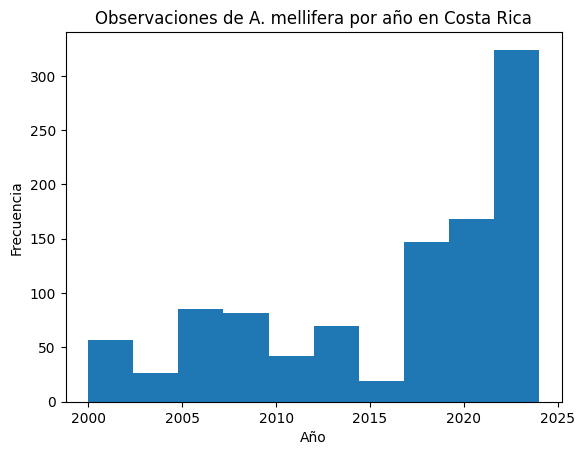

In [ ]:
# Análisis de observaciones de Apis mellifera por año en Costa Rica
df_costa_rica['year'].hist()

# Título del grafico
plt.title('Observaciones de A. mellifera por año en Costa Rica')
# Etiqueta del eje X
plt.xlabel('Año')
# Etiqueta del eje Y
plt.ylabel('Frecuencia')
# Quitar cuadrícula
plt. grid(False)

plt.show()

El gráfico representa la frecuencia de observaciones de *Apis mellifera* en Costa Rica a través de los años. Comenzando en el año 2000 con alrededor de 50 observaciones y manteniendo estas frecuencias hasta el año 2017 donde ya se comienza a apreciar un incremento significativo en las observaciones. Presentandose los mayores datos de observación de *A. mellifera* desde el 2022 y 2024.

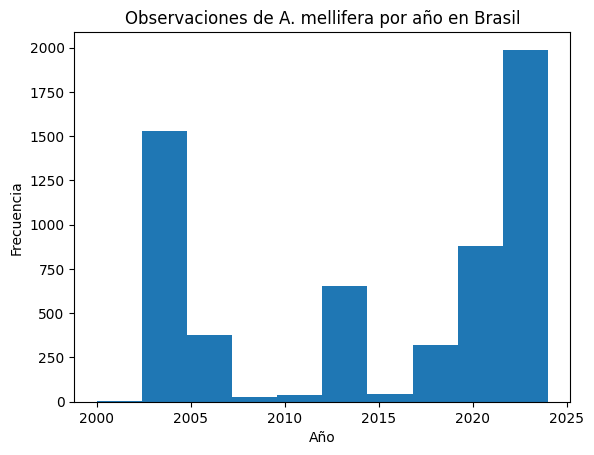

In [ ]:
# Analisis de observaciones de *Apis mellifera* por año en Brasil
df_brasil['year'].hist()

# Título del grafico
plt.title('Observaciones de A. mellifera por año en Brasil')
# Etiqueta del eje X
plt.xlabel('Año')
# Etiqueta del eje Y
plt.ylabel('Frecuencia')
# Quitar cuadrícula
plt. grid(False)

plt.show()

El gráfico muestra como las observaciones de la especie *Apis mellifera* han cambiado a lo largo de los años en Brasil. En la figura se muestra la frecuencia de observaciones, empezando en el año 2000 con alrededor de 1750 observaciones y luego disminuyendo a 250 durante el 2005. Presentandose un fuerte incremento en el 2020 con alrededor de 1750 observaciones. Estas variaciones podrían sugerir patrones o tendencias en la presencia o visibilidad de *A.mellifera* a lo largo del tiempo.

In [ ]:
# Crear GeodDataframe con las coordenadas de los puntos en Costa Rica
obs_points_cr = gpd.points_from_xy(df_costa_rica.decimalLongitude,df_costa_rica.decimalLatitude)

gdf_cr = gpd.GeoDataFrame(df_costa_rica, geometry=obs_points_cr)

<Axes: >

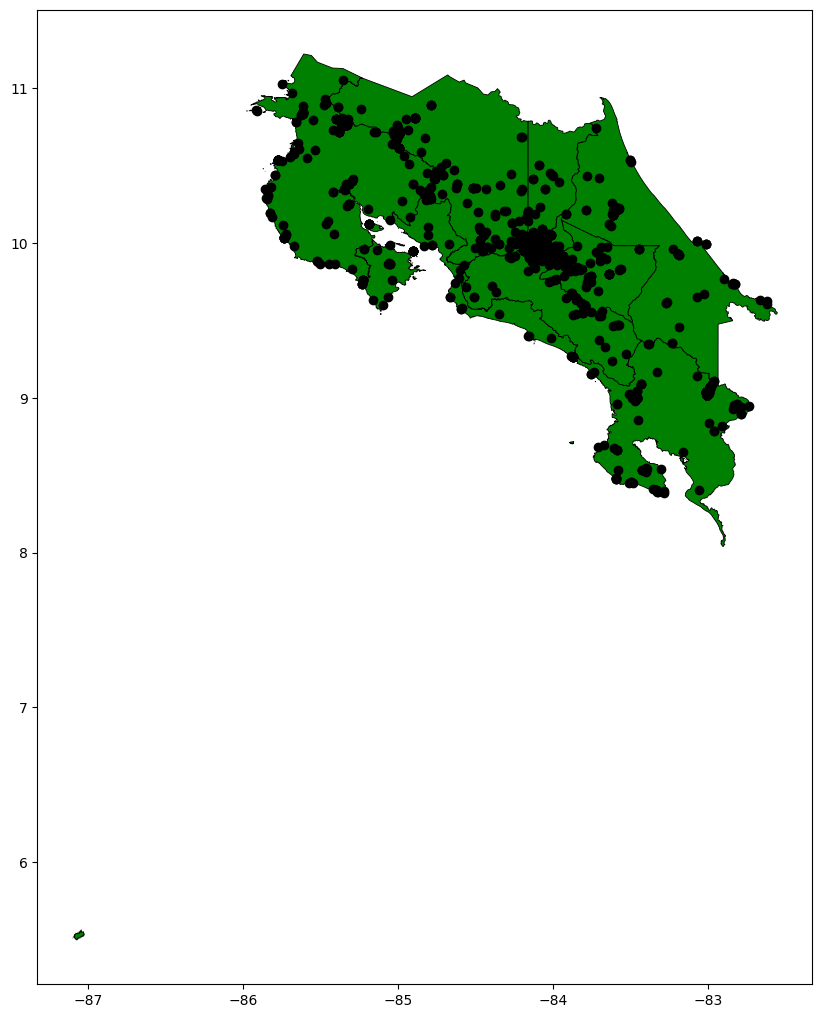

In [ ]:
# Grafico de Costa Rica con los puntos de observaciones
mapa_cr= gpd.read_file('/content/gadm41_CRI_1.shp')
lienzo_cr = mapa_cr.plot(
    figsize = (10,15),
    color="green",
    edgecolor="black",
    linewidth = 0.6)

gdf_cr.plot(ax=lienzo_cr, color="black")

En la figura se pueden observar la distribución de la especie *Apis mellifera* en Costa Rica, presentandose una mayor concentración en la parte central del país, cerca de la Cordillera Central.

In [ ]:
# Crear GeodDataframe con las coordenadas de los puntos en Brasil
obs_points_br = gpd.points_from_xy(df_brasil.decimalLongitude,df_brasil.decimalLatitude)

gdf_br = gpd.GeoDataFrame(df_brasil, geometry=obs_points_br)

<Axes: >

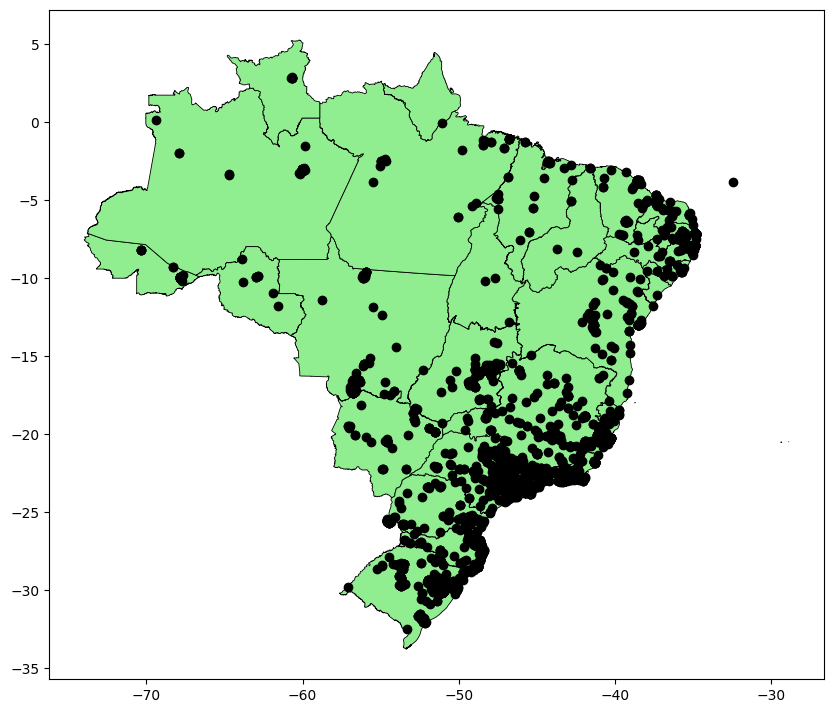

In [ ]:
# Grafico de Brasil con los puntos de observaciones
mapa_br= gpd.read_file('/content/gadm41_BRA_1.shp')
lienzo_br = mapa_br.plot(
    figsize = (10,12),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

gdf_br.plot(ax=lienzo_br, color="black")

En la figura se pueden observar la distribución de la especie *Apis mellifera* en Brasil y se puede apreciar una mayor concentración de observaciones en la parte sureste del país.

In [ ]:
# Para las variables ambientales:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar los archivos raster desde Google Drive
prec_raster = rxr.open_rasterio('/content/drive/My Drive/Prec_1.asc', masked=True)
temp_raster = rxr.open_rasterio('/content/drive/My Drive/Temp_1.asc', masked=True)

In [ ]:
# Recortar las capas raster a las áreas de Costa Rica y Brasil
temp_costa_rica = temp_raster.rio.clip(mapa_cr.geometry, mapa_cr.crs)
temp_brasil = temp_raster.rio.clip(mapa_br.geometry, mapa_br.crs)

prec_costa_rica = prec_raster.rio.clip(mapa_cr.geometry, mapa_cr.crs)
prec_brasil = prec_raster.rio.clip(mapa_br.geometry, mapa_br.crs)

In [ ]:
# Extraer valores de temperatura y precipitación para cada punto de observación
def extract_values(gdf, raster):
    coords = [(x,y) for x, y in zip(gdf.geometry.x, gdf.geometry.y)]
    values = [raster.sel(x=lon, y=lat, method="nearest").values for lon, lat in coords]
    return np.array(values).flatten()

# Extraer valores de temperatura y precipitación para Costa Rica
gdf_cr['temp_promedio'] = extract_values(gdf_cr , temp_costa_rica)
gdf_cr['precipitacion'] = extract_values(gdf_cr , prec_costa_rica)

# Extraer valores de temperatura y precipitación para Brasil
gdf_br['temp_promedio'] = extract_values(gdf_br, temp_brasil)
gdf_br['precipitacion'] = extract_values(gdf_br, prec_brasil)

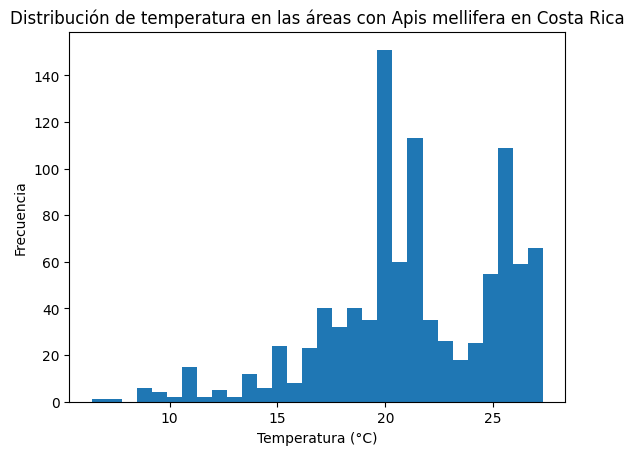

In [ ]:
# Histograma de temperatura en Costa Rica
plt.hist(gdf_cr['temp_promedio'], bins=30)
plt.title('Distribución de temperatura en las áreas con Apis mellifera en Costa Rica')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.show()

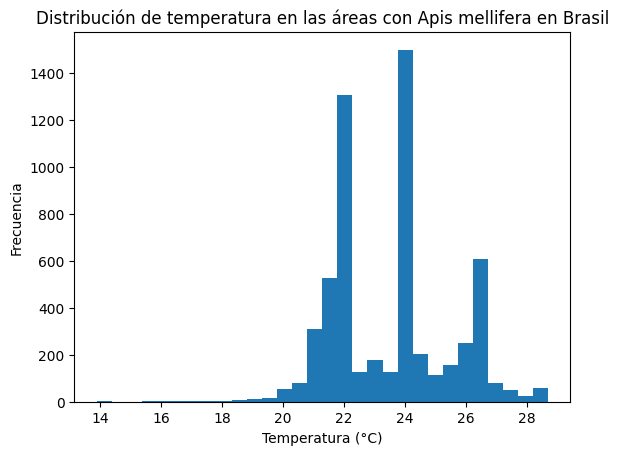

In [ ]:
# Histograma de temperatura en Brasil
plt.hist(gdf_br['temp_promedio'], bins=30)
plt.title('Distribución de temperatura en las áreas con Apis mellifera en Brasil')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.show()

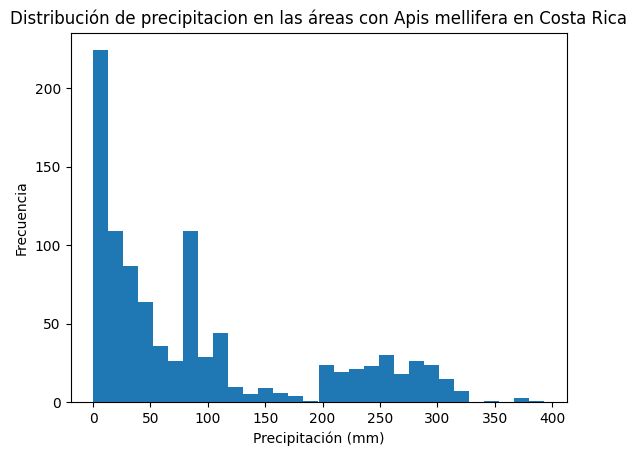

In [ ]:
# Histograma de precipitaciones en Costa Rica
plt.hist(gdf_cr['precipitacion'], bins=30)
plt.title('Distribución de precipitacion en las áreas con Apis mellifera en Costa Rica')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

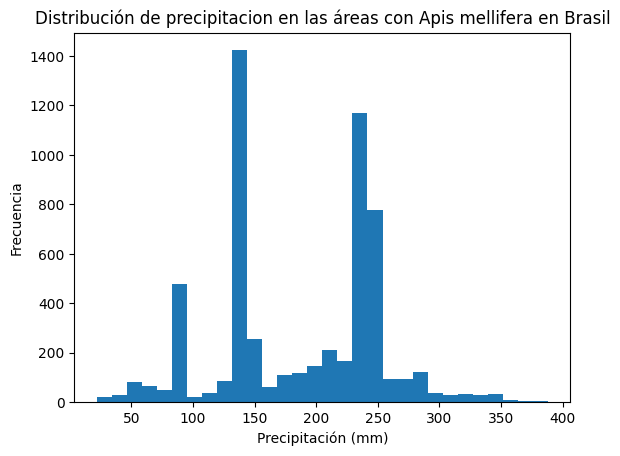

In [ ]:
# Histograma de precipitaciones en Brasil
plt.hist(gdf_br['precipitacion'], bins=30)
plt.title('Distribución de precipitacion en las áreas con Apis mellifera en Brasil')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Renombrar las columnas de ambos GeoDataframes
gdf_cr = gdf_cr.rename(columns={'decimalLatitude': 'Latitud', 'decimalLongitude': 'Longitud',
                                'temp_promedio': 'Temp_promedio', 'precipitacion': 'Precipitacion'
                                })
gdf_br = gdf_br.rename(columns={'decimalLatitude': 'Latitud', 'decimalLongitude': 'Longitud',
                                'temp_promedio': 'Temp_promedio', 'precipitacion': 'Precipitacion'
                                })

## **Resultados**

Análisis de correlación entre las variables ambientales (precipitación y temperatura promedio) y los datos de observaciones de *Apis mellifera* en Costa Rica y en Brasil

In [ ]:
# En el caso de Costa Rica

# Formato de las variables numérico
gdf_cr['Latitud'] = pd.to_numeric(gdf_cr['Latitud'], errors='coerce')
gdf_cr['Longitud'] = pd.to_numeric(gdf_cr['Longitud'], errors='coerce')
gdf_cr['Temp_promedio'] = pd.to_numeric(gdf_cr['Temp_promedio'], errors='coerce')
gdf_cr['Precipitacion'] = pd.to_numeric(gdf_cr['Precipitacion'], errors='coerce')

# Columnas de interés para el análisis
df_corr_cr = gdf_cr[['Latitud', 'Longitud', 'Temp_promedio', 'Precipitacion']]

# Matriz de correlación
matriz_corr_cr = df_corr_cr.corr(method='pearson')

# Imprimir la matriz de correlación
print(matriz_corr_cr)

                Latitud  Longitud  Temp_promedio  Precipitacion
Latitud        1.000000 -0.782699       0.248599       0.173208
Longitud      -0.782699  1.000000      -0.412106       0.206518
Temp_promedio  0.248599 -0.412106       1.000000       0.089338
Precipitacion  0.173208  0.206518       0.089338       1.000000


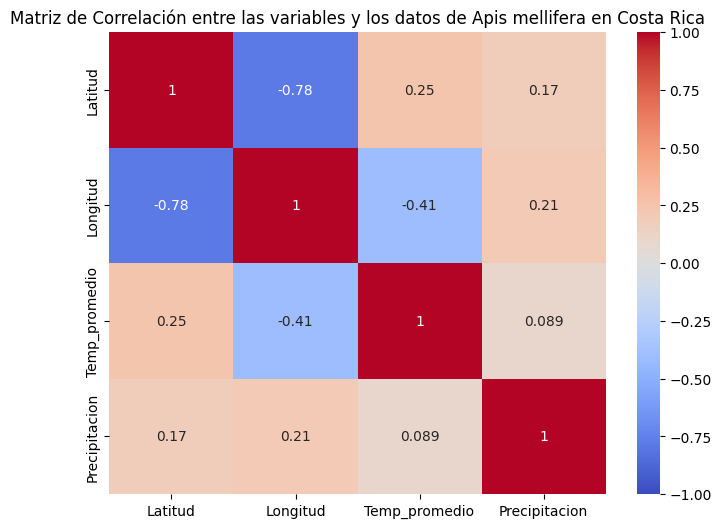

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr_cr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre las variables y los datos de Apis mellifera en Costa Rica')
plt.show()

In [ ]:
# En el caso de Brasil

# Formato de las variables numérico
gdf_br['Latitud'] = pd.to_numeric(gdf_br['Latitud'], errors='coerce')
gdf_br['Longitud'] = pd.to_numeric(gdf_br['Longitud'], errors='coerce')
gdf_br['Temp_promedio'] = pd.to_numeric(gdf_br['Temp_promedio'], errors='coerce')
gdf_br['Precipitacion'] = pd.to_numeric(gdf_br['Precipitacion'], errors='coerce')

# Columnas de interés para el análisis
df_corr_br = gdf_br[['Latitud', 'Longitud', 'Temp_promedio', 'Precipitacion']]

# Matriz de correlación
matriz_corr_br = df_corr_br.corr(method='pearson')

# Imprimir la matriz de correlación
print(matriz_corr_br)

                Latitud  Longitud  Temp_promedio  Precipitacion
Latitud        1.000000  0.608549       0.303888      -0.025516
Longitud       0.608549  1.000000       0.309891      -0.395458
Temp_promedio  0.303888  0.309891       1.000000      -0.631582
Precipitacion -0.025516 -0.395458      -0.631582       1.000000


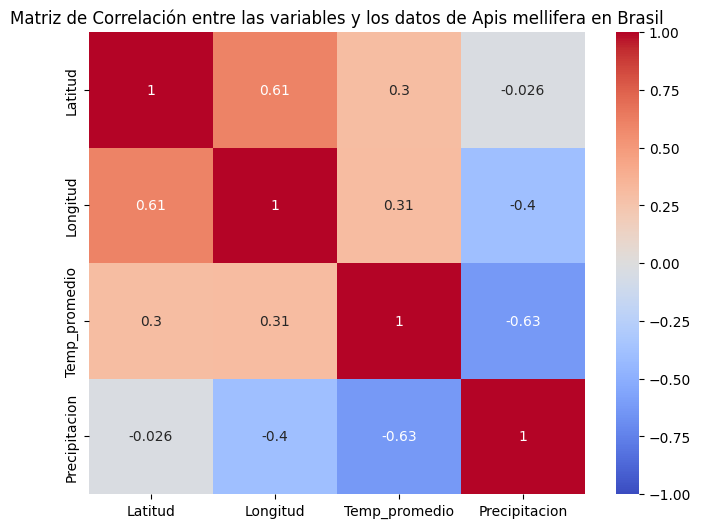

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr_br, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre las variables y los datos de Apis mellifera en Brasil')
plt.show()

## **Conclusiones**



En conclusión, las observaciones de Apis mellifera han mostrado un incremento gradual en Costa Rica, con una mayor concentración en el área central del país, mientras que en Brasil se observaron patrones más fluctuantes, con un pico entre 2002 y 2007 y una mayor concentración en las áreas del sur y sureste. En términos de factores ambientales, en Costa Rica la especie tiende a observarse con mayor frecuencia a temperaturas más bajas (19-22°C) y baja precipitación (0-10 mm), mientras que en Brasil las observaciones son más comunes a temperaturas de 22-24°C y precipitaciones de 24 mm y 140 mm. Esto sugiere que la distribución de A. mellifera está influenciada de manera diferente por las variables ambientales en cada país, reflejando la adaptabilidad de la especie a distintos contextos geográficos y climáticos.







## **Bibliografía**

Calderón, R., Padilla. S,. Ramírez, M (2019). Preliminary study on the presence of bee diseases in swarms of Africanized honey bees (Apis mellifera) in different areas of Costa Rica. (2019). Ciencias Veterinarias, 37(1), 13-25. https://doi.org/10.15359/rcv.37-1.2

Fick, S.E. y Hijmans, R.J. (2017). WorldClim 2: new 1km spatial resolution climate surfaces for global land areas. International Journal of Climatology 37 (12): 4302-4315. https://doi.org/10.1002/joc.5086

GBIF.org (20 September 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.s4w66f

Guzmán-Novoa, E., Correa, A., Espinosa, L., & Guzmán, G. 2011. Colonización, impacto y control de las abejas melíferas africanizadas en México. Vet. Méx. 42: 149-178

Martínez, J., Medina, L., & Catzín, G. 2011. Frecuencia de Varroa destructor, Nosema apis y Acarapis woodi en colonias manejadas y enjambres silvestres de abejas (Apis mellifera) en Mérida, Yucatán, México. Rev. Mex. Cienc. Pecu. 2: 25-38

Sevilla-Benavides, F., Castro-Morales, O., Quesada-Obando, V. H., Murillo-Sabillón, L., & Valverde-Abarca, A. (2023). Importancia del análisis y la conservación del semen de abeja melífera (Apis mellifera) bajo condiciones tropicales. Investiga. TEC, 16(48), 4-10. https://revistas.tec.ac.cr/index.php/investiga_tec/article/view/6874/6670

Spivak, M., Fletcher, J., & Breed, M. 1991. The “African” Honey Bee. Westview. US. 435 p

Tapia-González, J., León-Mantecón, T., Contreras-Escareño, F., Macias-Macias, J., Tapia-Rivera, J., & Guzmán-Novoa, E. (2021). Influencias climáticas, regionales y cantidad de cría en el comportamiento higiénico de Apis mellifera. Abanico veterinario, 11. https://www.scielo.org.mx/scielo.php?pid=S2448-61322021000100115&script=sci_arttext  